In [1]:
import pandas as pd
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential, Input
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from keras.datasets import cifar10
from tqdm import tqdm

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
Y_train = Y_train.reshape(-1, )
Y_test = Y_test.reshape(-1, )

In [4]:
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (50000, 32, 32, 3)
Y_train shape :  (50000,)
X_test shape :  (10000, 32, 32, 3)
Y_test shape :  (10000,)


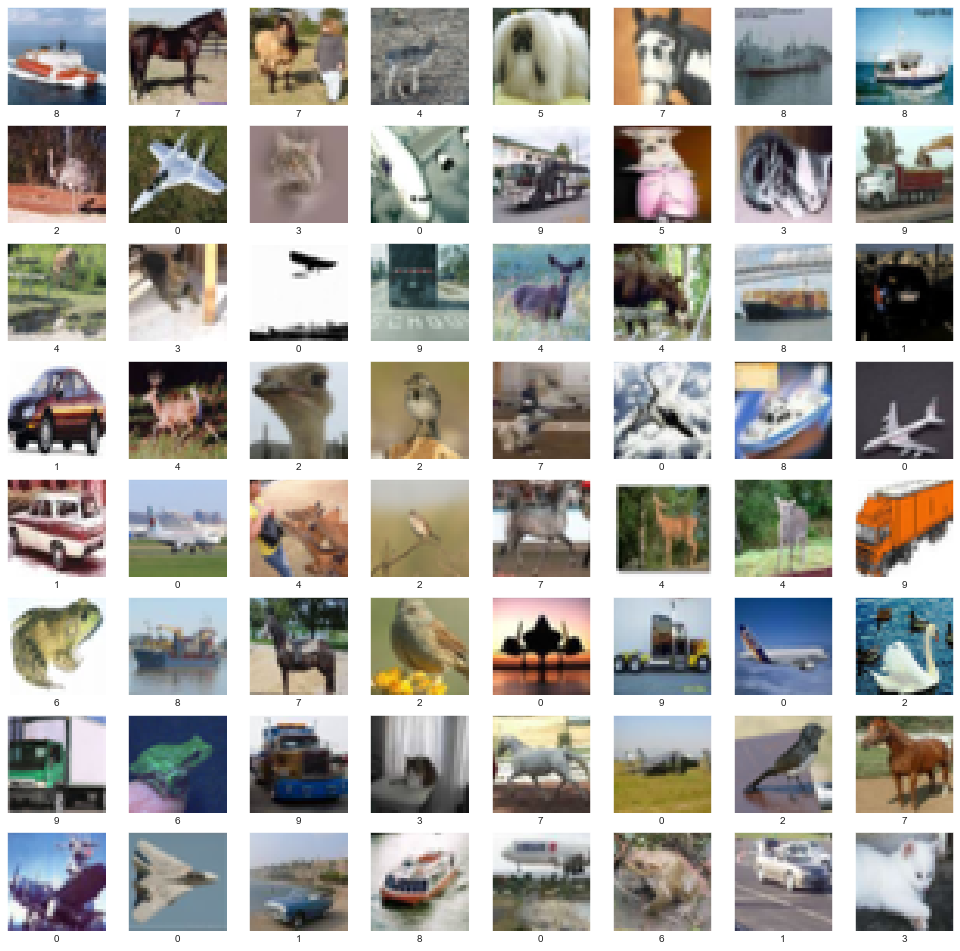

In [8]:
plt.figure(figsize=(17, 17))
random_num = np.random.randint(0, 13439, size=64)
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[random_num[i]])
    plt.xlabel(int(Y_train[random_num[i]]))

In [150]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<h1>TRAIN DATASET</h1>


In [569]:
vehicles_images = []
for i in tqdm(range(len(Y_train))):
    if ((Y_train[i] == 1) or (Y_train[i] == 9)):
        vehicles_images.append(X_train[i])


100%|██████████| 50000/50000 [00:00<00:00, 272869.83it/s]


In [570]:
len(vehicles_images)

10000

In [571]:
vehicles_images = np.array(vehicles_images)

In [572]:
vehicles_images.shape

(10000, 32, 32, 3)

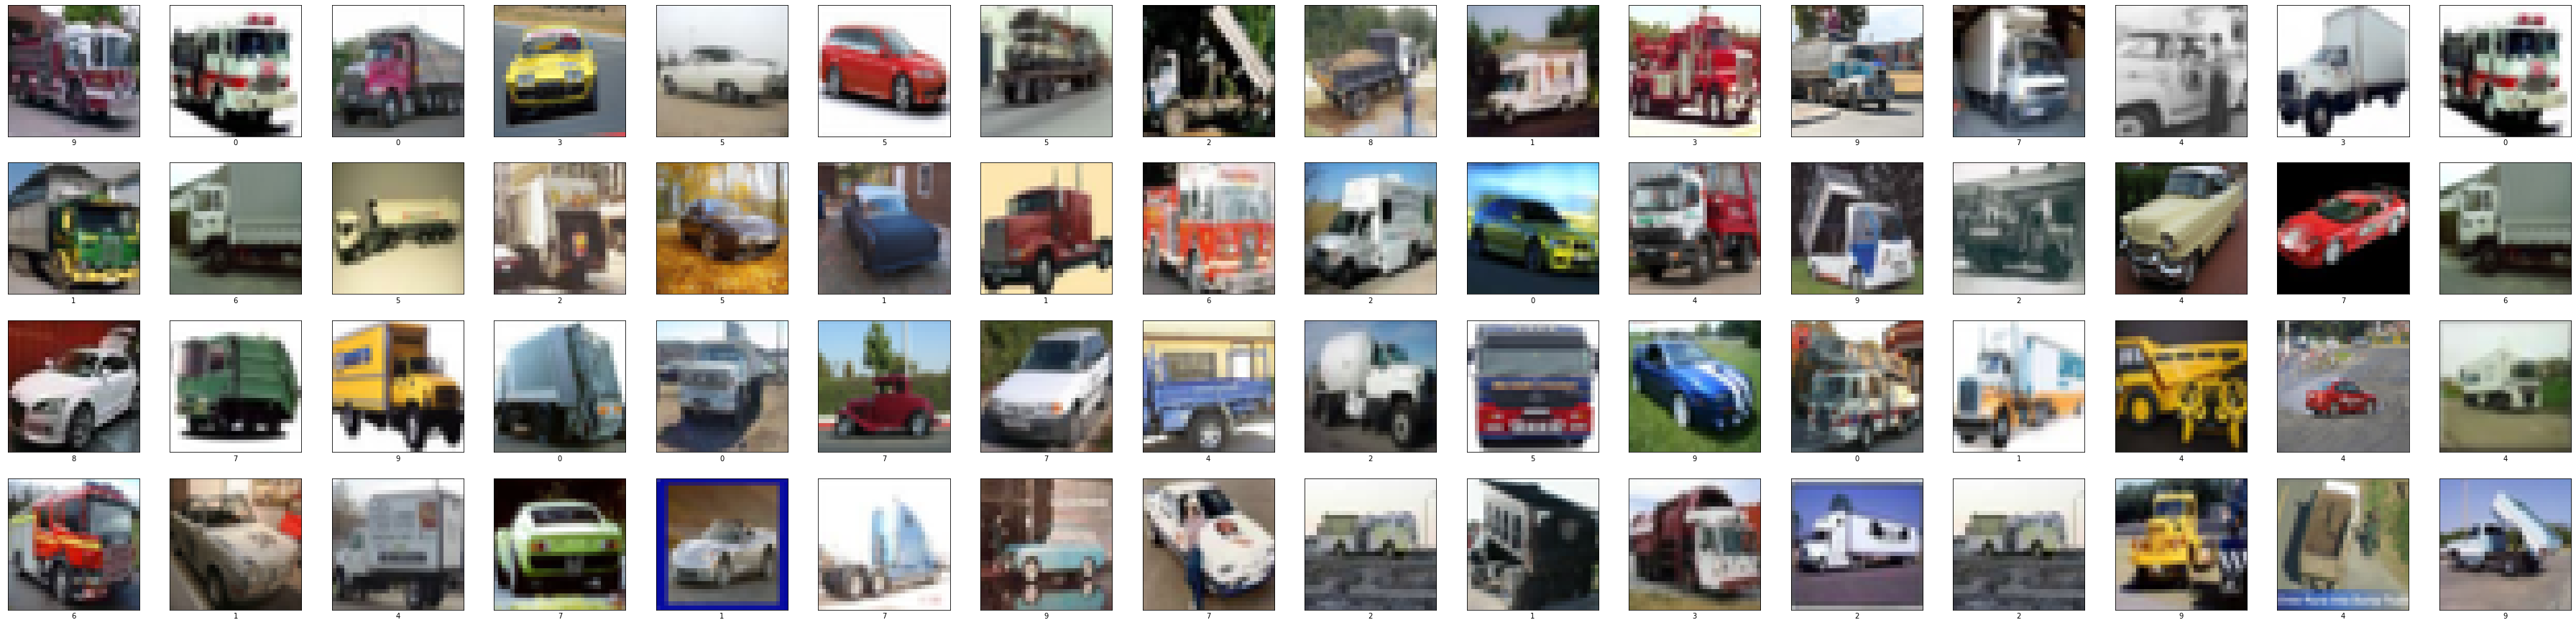

In [556]:
plt.figure(figsize=(64, 64))
random_num = np.random.randint(0, 1000, size=100)
for i in range(64):
    plt.subplot(16, 16, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(vehicles_images[random_num[i]])
    plt.xlabel(int(Y_train[random_num[i]]))

In [573]:
non_vehicles_images = []
for i in tqdm(range(len(Y_train))):
    if ((Y_train[i] != 1) and (Y_train[i] != 9)):
        non_vehicles_images.append(X_train[i])

100%|██████████| 50000/50000 [00:00<00:00, 247391.72it/s]


In [594]:
len(non_vehicles_images)

40000

In [595]:
non_vehicles_images = np.array(non_vehicles_images[:10000])

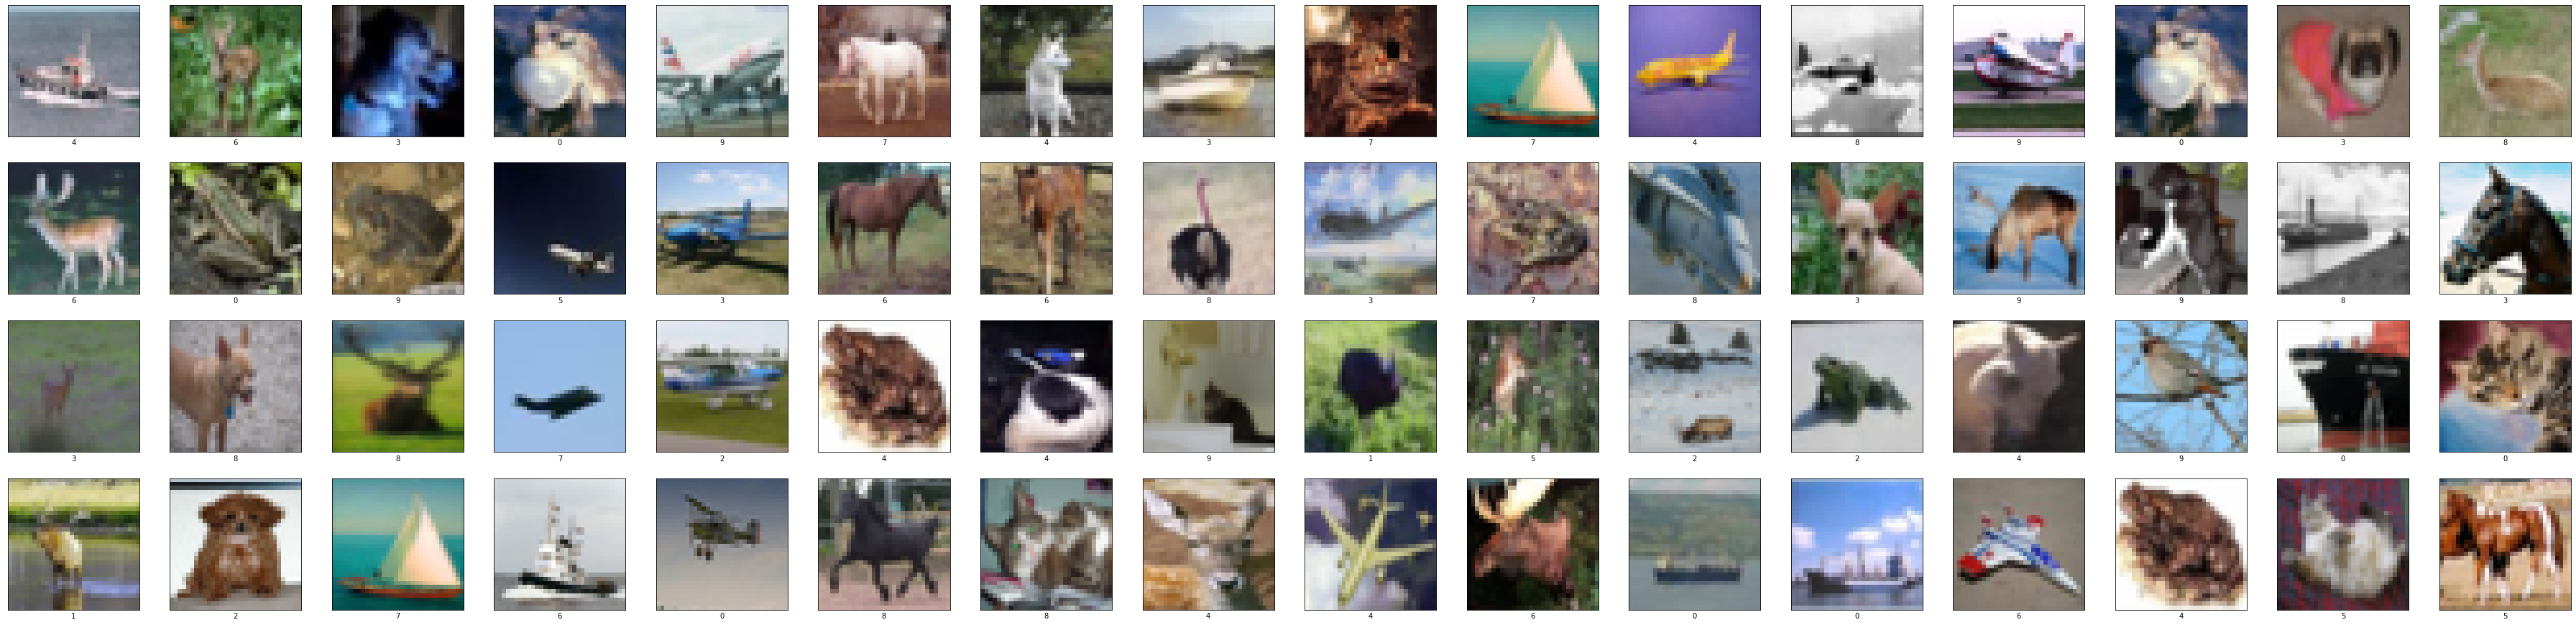

In [549]:
plt.figure(figsize=(64, 64))
random_num = np.random.randint(0, 1000, size=100)
for i in range(64):
    plt.subplot(16, 16, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(non_vehicles_images[random_num[i]])
    plt.xlabel(int(Y_train[random_num[i]]))

In [596]:
y_train = []


In [597]:
x_train = np.concatenate([vehicles_images, non_vehicles_images], axis=0)

In [598]:
len(vehicles_images)

10000

In [599]:
#vehicles
for i in range(0,len(vehicles_images)):
    y_train.append(1)

In [600]:
for i in range(0,len(non_vehicles_images)):
    y_train.append(0)

In [601]:
len(y_train)

20000

In [622]:
y_train = np.array(y_train)

In [623]:
y_train[10020]

0

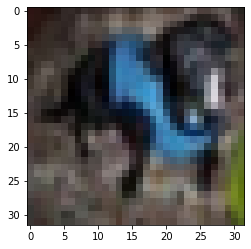

In [624]:
plt.imshow(x_train[10020])

<h1>TEST DATASET</h1>

In [610]:
vehicles_images_test = []
for i in tqdm(range(len(Y_test))):
    if ((Y_test[i] == 1) or (Y_test[i] == 9)):
        vehicles_images_test.append(X_test[i])

100%|██████████| 10000/10000 [00:00<00:00, 197823.07it/s]


In [611]:
vehicles_images_test = np.array(vehicles_images_test)

In [616]:
len(vehicles_images_test)

2000

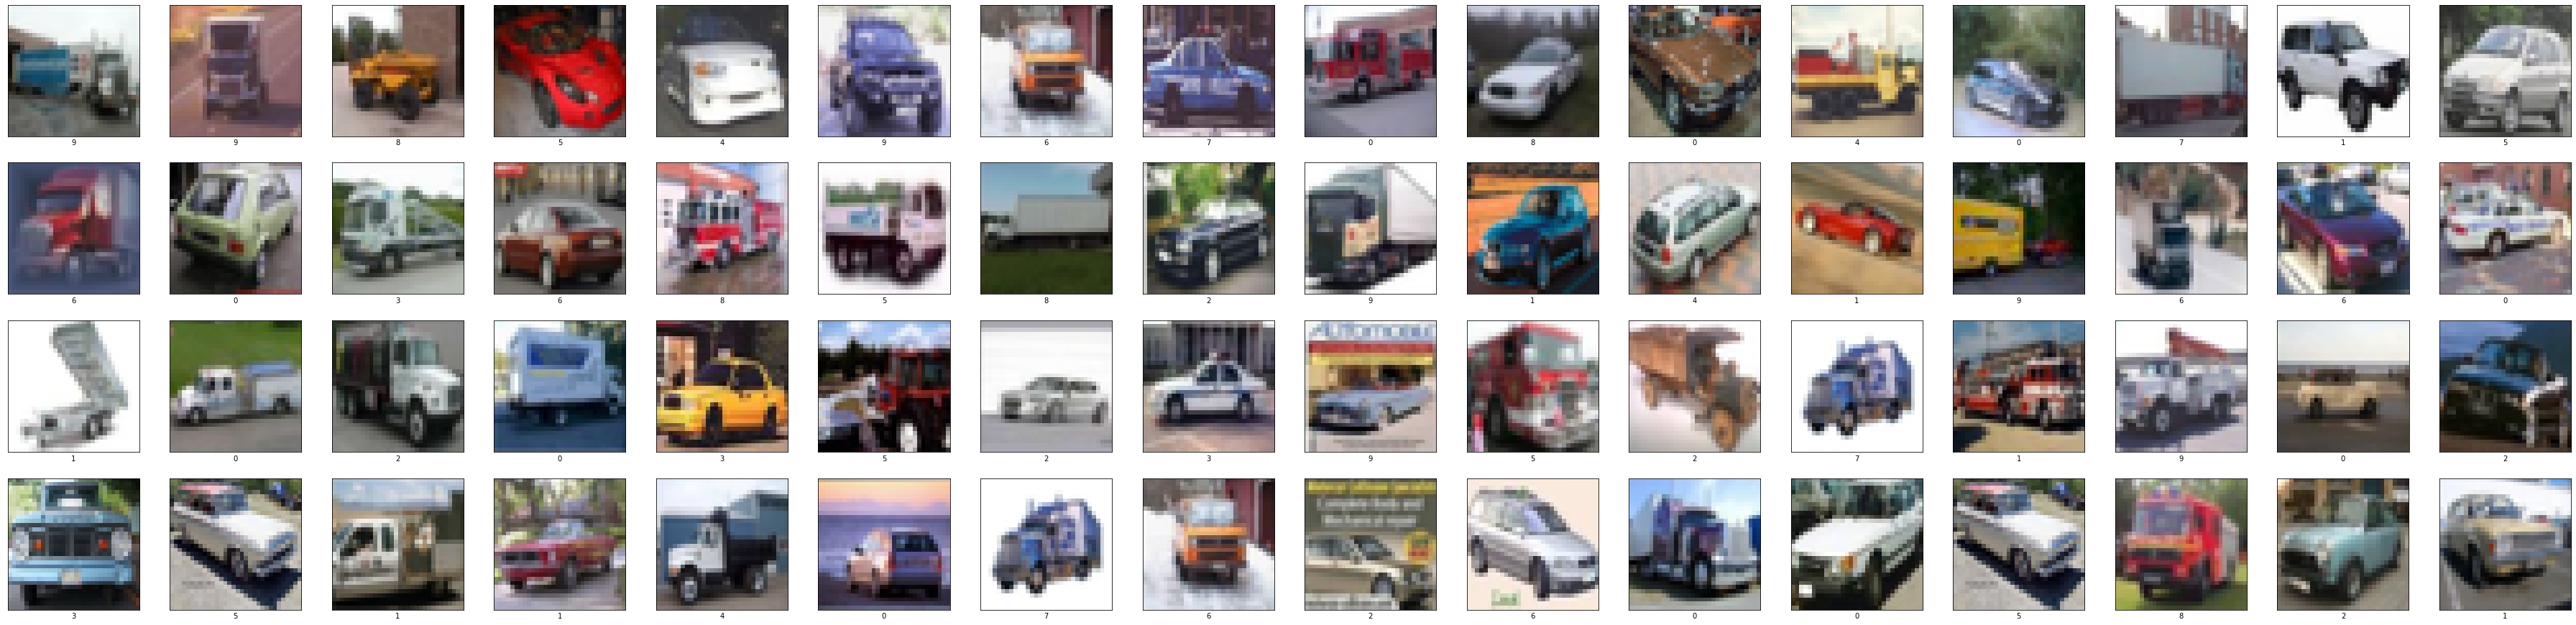

In [612]:
plt.figure(figsize=(64, 64))
random_num = np.random.randint(0, 500, size=100)
for i in range(64):
    plt.subplot(16, 16, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(vehicles_images_test[random_num[i]])
    plt.xlabel(int(Y_train[random_num[i]]))

In [613]:
non_vehicles_images_test = []
for i in tqdm(range(4000)):
    if ((Y_test[i] != 1) and (Y_test[i] != 9)):
        non_vehicles_images_test.append(X_test[i])

100%|██████████| 4000/4000 [00:00<00:00, 190715.20it/s]


In [617]:
non_vehicles_images_test = np.array(non_vehicles_images_test[:2000])

In [618]:
x_test = np.concatenate([vehicles_images_test, non_vehicles_images_test], axis=0)

In [620]:
y_test = []


In [621]:
#vehicles
for i in range(0, len(vehicles_images_test)):
    y_test.append(1)
for i in range(0, len(non_vehicles_images_test)):
    y_test.append(0)

In [625]:
y_test= np.array(y_test)

In [627]:
print(x_test.shape)
print(y_test.shape)

(4000, 32, 32, 3)
(4000,)


<h1>Processing and Augmenting  DATASET</h1>


In [5]:
X_train = X_train / 255.0
X_test = X_test/ 255.0

In [6]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [5]:
def build_model(image_dim,  optimizer='adam', activation='relu', kernel_initializer='he_normal'):
    model = Sequential()

    model.add(Input(image_dim))
    #model.add(Lambda(lambda x: tf.cast(tf.greater(x, 0.5), tf.float32)))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation=activation))
    model.add(BatchNormalization())

    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(10, activation = "softmax"))
    model.compile(loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=optimizer)
    return model

In [6]:
image_dim = (32,32,3)
print(image_dim)
model = build_model(image_dim,  optimizer=tf.keras.optimizers.Adam(), activation='relu')
model.summary()

(32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                            

In [7]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
X_val = X_test
Y_val = Y_test

In [12]:
model = tf.keras.models.load_model("car_detection_model.h5")

In [18]:
history = model.fit(X_train,Y_train,
                    batch_size=1024,
                    validation_data=(X_val, Y_val),
                    epochs=30,
                    verbose=1)

Epoch 1/30


2022-11-20 09:28:41.661785: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


49/49 [==============================] - 289s 6s/step - loss: 0.0151 - accuracy: 0.9964 - val_loss: 1.1505 - val_accuracy: 0.7568
Epoch 2/30
49/49 [==============================] - 289s 6s/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 1.2212 - val_accuracy: 0.7522
Epoch 3/30
49/49 [==============================] - 288s 6s/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 1.1987 - val_accuracy: 0.7480
Epoch 4/30
49/49 [==============================] - 288s 6s/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 1.2140 - val_accuracy: 0.7565
Epoch 5/30
49/49 [==============================] - 289s 6s/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 1.2332 - val_accuracy: 0.7541
Epoch 6/30
49/49 [==============================] - 288s 6s/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 1.2351 - val_accuracy: 0.7577
Epoch 7/30
49/49 [==============================] - 288s 6s/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 1.2180 - val_accuracy: 0.7548
Epoch 8/30
49/49 [======

In [19]:
model.save("car_detection_model.h5")

In [34]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 15s 48ms/step - loss: 1.2612 - accuracy: 0.7675


[1.261214017868042, 0.7674999833106995]

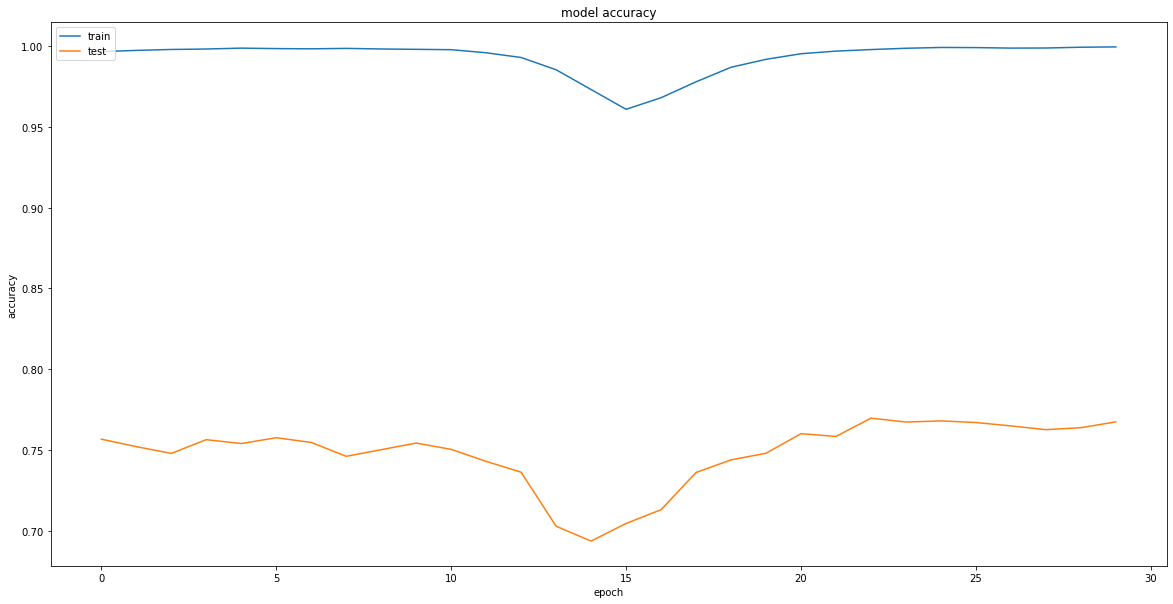

In [22]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

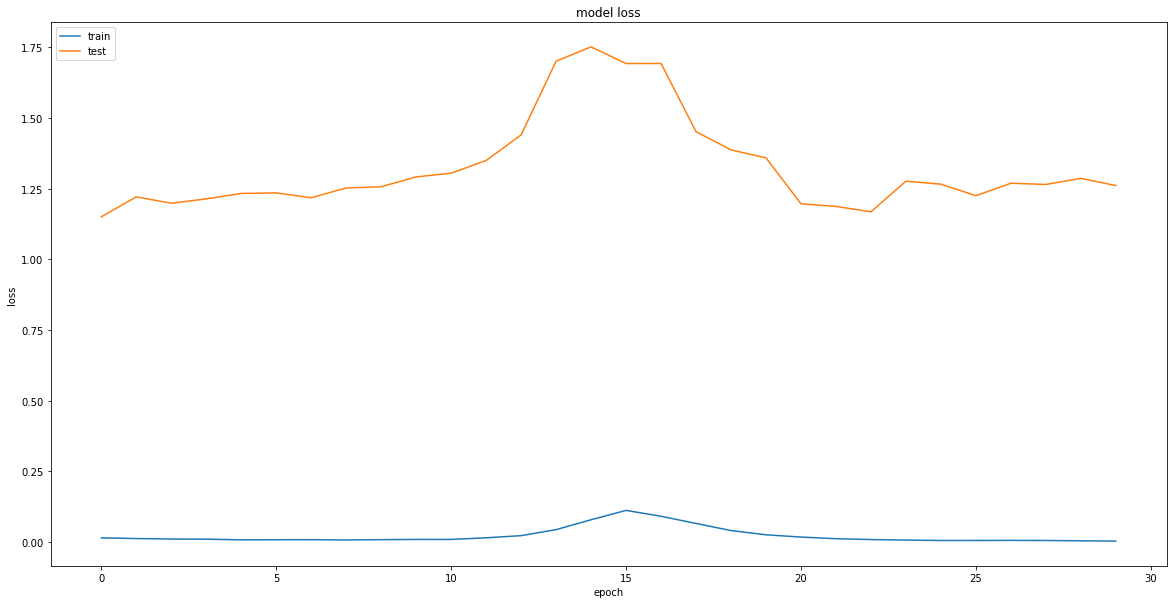

In [23]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred = model.predict(X_test)


313/313 [==============================] - 41s 131ms/step


In [14]:
y_obs = np.argmax(y_pred, axis=1)
y_true = Y_test

Test Accuracy:  0.1372


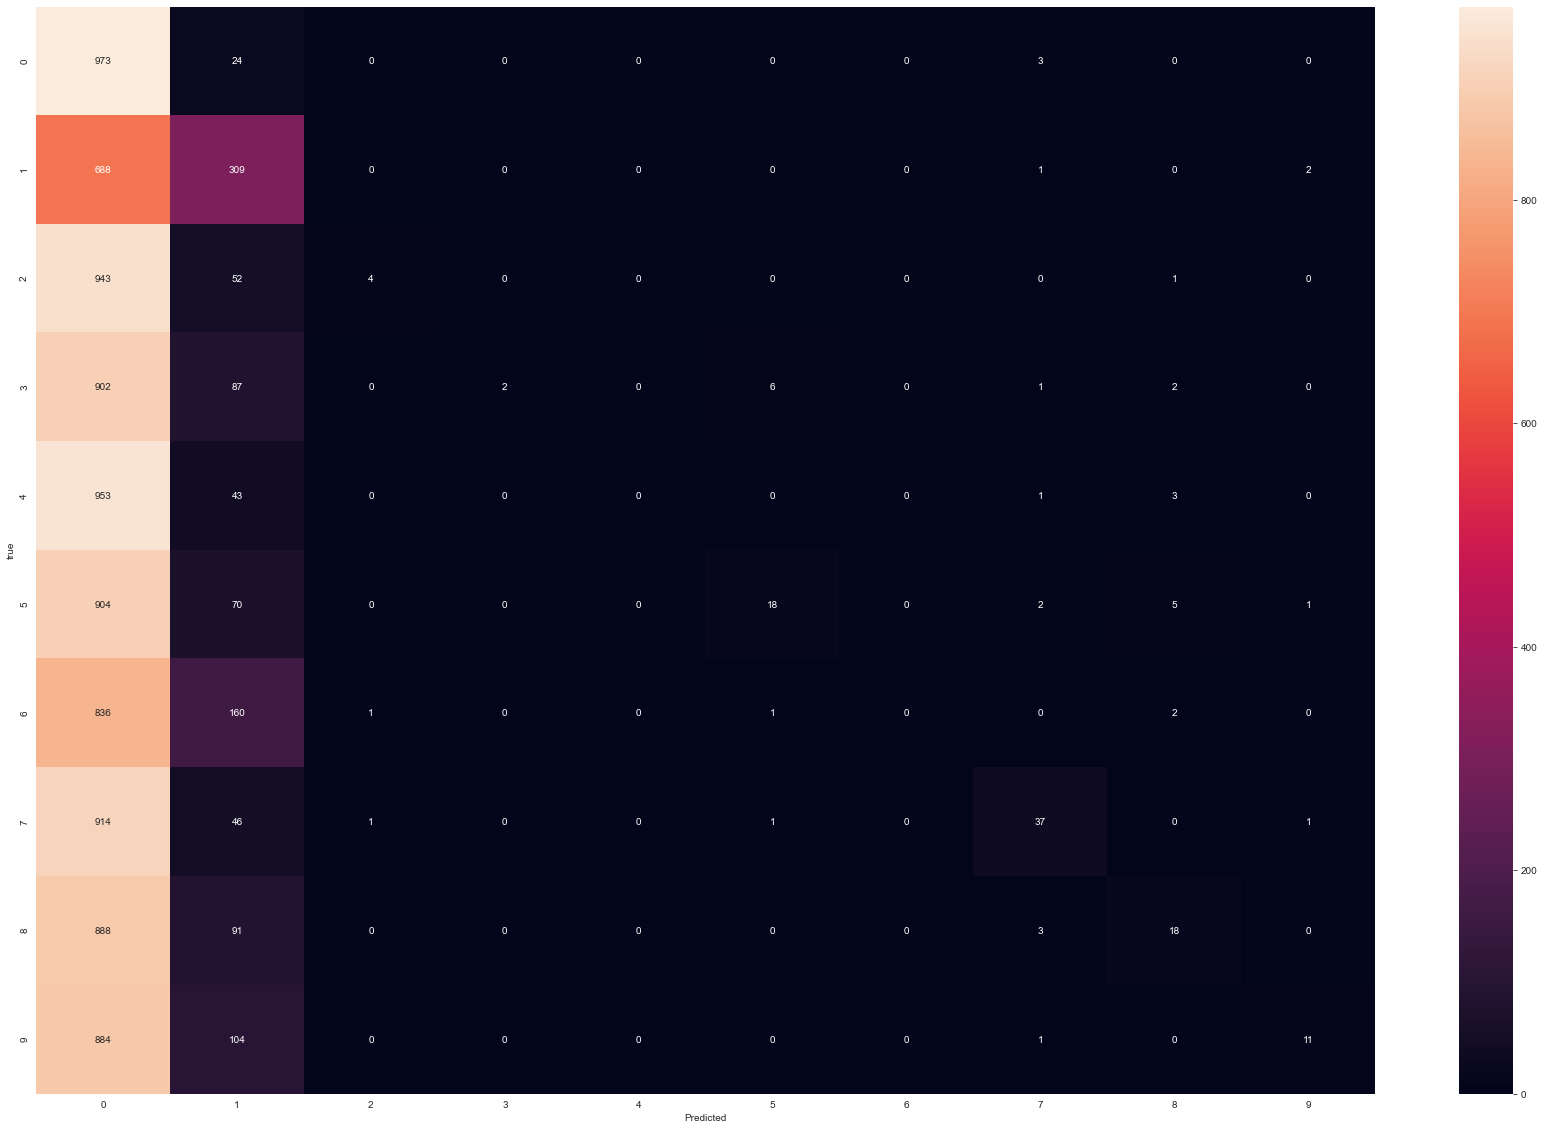

In [15]:
test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)
print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [27]:
print(classification_report(y_true, y_obs))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.89      0.84      0.86      1000
           2       0.70      0.65      0.67      1000
           3       0.58      0.59      0.59      1000
           4       0.73      0.74      0.74      1000
           5       0.66      0.68      0.67      1000
           6       0.81      0.85      0.83      1000
           7       0.82      0.81      0.81      1000
           8       0.90      0.85      0.87      1000
           9       0.80      0.88      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



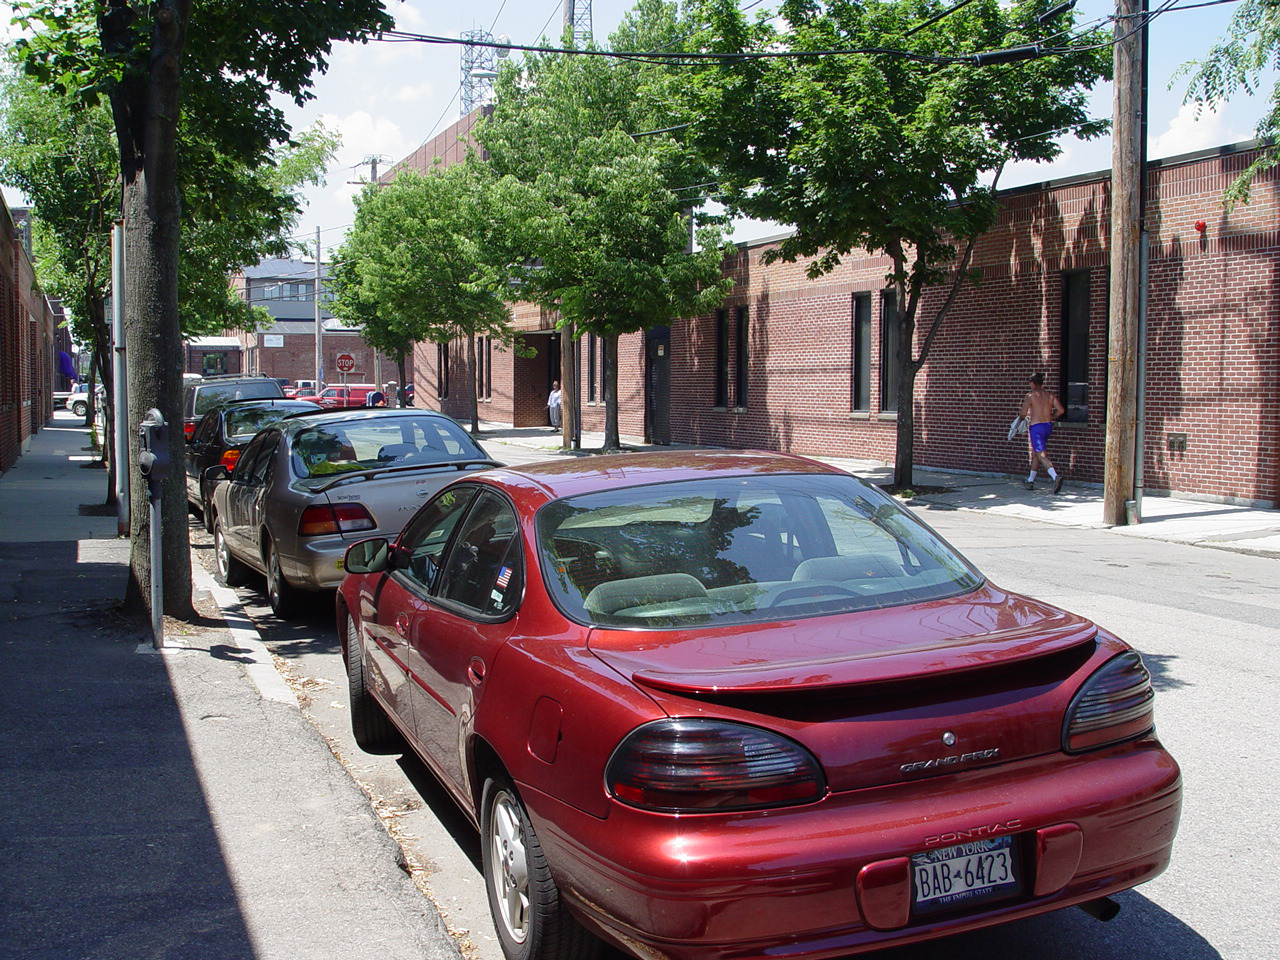

In [5]:
import PIL.Image as Image
Image.open("C:\\Users\\Muhammad Muzammil\\Downloads\\Images\\Original\\SSDB00058.JPG")


(32, 32, 3)


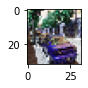

In [28]:
img = cv2.resize(cv2.imread("/home/muzammil/PycharmProjects/RealTimeCarDetection/notebooks/Real Time Car Detection CNN/Images/Original/SSDB00058.JPG"), (32,32))
plt.figure(figsize=(1,1))
plt.imshow(img)
print(img.shape)

In [29]:
test_image = np.array(img).reshape( [-1, 32, 32, 3])
test_image=test_image/255.0

In [30]:
test_image

array([[[[0.98431373, 0.96862745, 0.96862745],
         [0.87843137, 0.84313725, 0.63529412],
         [0.08627451, 0.18431373, 0.08235294],
         ...,
         [0.98039216, 0.87843137, 0.75686275],
         [0.97647059, 0.88235294, 0.75686275],
         [0.69019608, 0.6627451 , 0.54117647]],

        [[0.52156863, 0.60392157, 0.56470588],
         [0.23921569, 0.68627451, 0.52941176],
         [0.47843137, 0.59607843, 0.34901961],
         ...,
         [0.97254902, 0.89019608, 0.79215686],
         [0.85098039, 0.83921569, 0.69019608],
         [0.55294118, 0.66666667, 0.58431373]],

        [[0.69019608, 0.75686275, 0.63529412],
         [0.06666667, 0.23529412, 0.18039216],
         [0.04705882, 0.1254902 , 0.10588235],
         ...,
         [0.90196078, 0.8745098 , 0.80784314],
         [0.79215686, 0.80392157, 0.61176471],
         [0.96078431, 0.87843137, 0.76470588]],

        ...,

        [[0.27843137, 0.2       , 0.17254902],
         [0.34901961, 0.25882353, 0.22745098]

In [31]:
prediction =model.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [32]:
result = np.argmax(prediction)

In [33]:
if((result == 1) or (result==9)):
    print("vehicle detected....")
else:
    print("not a vehicle.....")

vehicle detected....


In [5]:
import cv2
import time
import os

def video_to_frames(input_loc, output_loc):
    """Function to extract frames from input video file
    and save them as separate frames in an output directory.
    Args:
        input_loc: Input video file.
        output_loc: Output directory to save the frames.
    Returns:
        None
    """
    try:
        os.mkdir(output_loc)
    except OSError:
        pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        if not ret:
            continue
        # Write the results back to output location.
        cv2.imwrite(output_loc + "/%#05d.jpg" % (count+1), frame)
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

if __name__=="__main__":

    input_loc = "C:\\Users\\Muhammad Muzammil\\Downloads\\videoplayback.mp4"
    output_loc = 'frames'
    video_to_frames(input_loc, output_loc)

Number of frames:  1439
Converting video..

Done extracting frames.
1439 frames extracted
It took 8 seconds forconversion.
